In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 
import numpy as np

import GenerateData as gd

In [2]:
!dolfin-convert data/mesh/bifurcation.msh data/mesh/bifurcation.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 11100 vertices
Found all vertices
Expecting 21006 cells
Found all cells
Conversion done


In [3]:
mesh_load = gd.MeshLoader("data/mesh/bifurcation")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face

In [4]:
tags = {'walls': [2], 'inlet':[1], 'outlet': [3], 'interface': [4,5,6,7], 'faces': [8,9,10,11,12]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f4bcac3bd30>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f4bcac3bd30>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f4bc8868670>))

Solving linear variational problem.
Object cannot be plotted directly, projecting to piecewise linears.


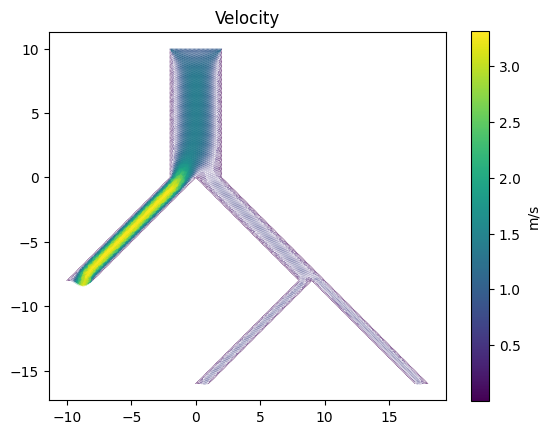

Object cannot be plotted directly, projecting to piecewise linears.


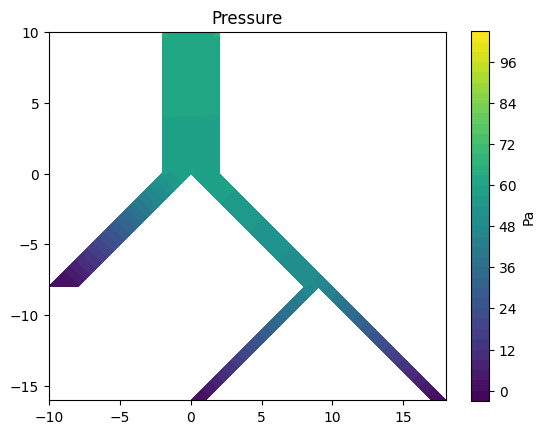

In [5]:
ns = gd.NavierStokes(mesh_load,'Navier-Stokes')
ns.solve()
ns.plot_solution()

In [6]:
data = gd.DataNS(ns,mesh_load)
flux = data.flux(tags['interface'][0])
print(flux)

3.1098422450940264
